In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.animation import FuncAnimation, PillowWriter

## Lax-Wendroff

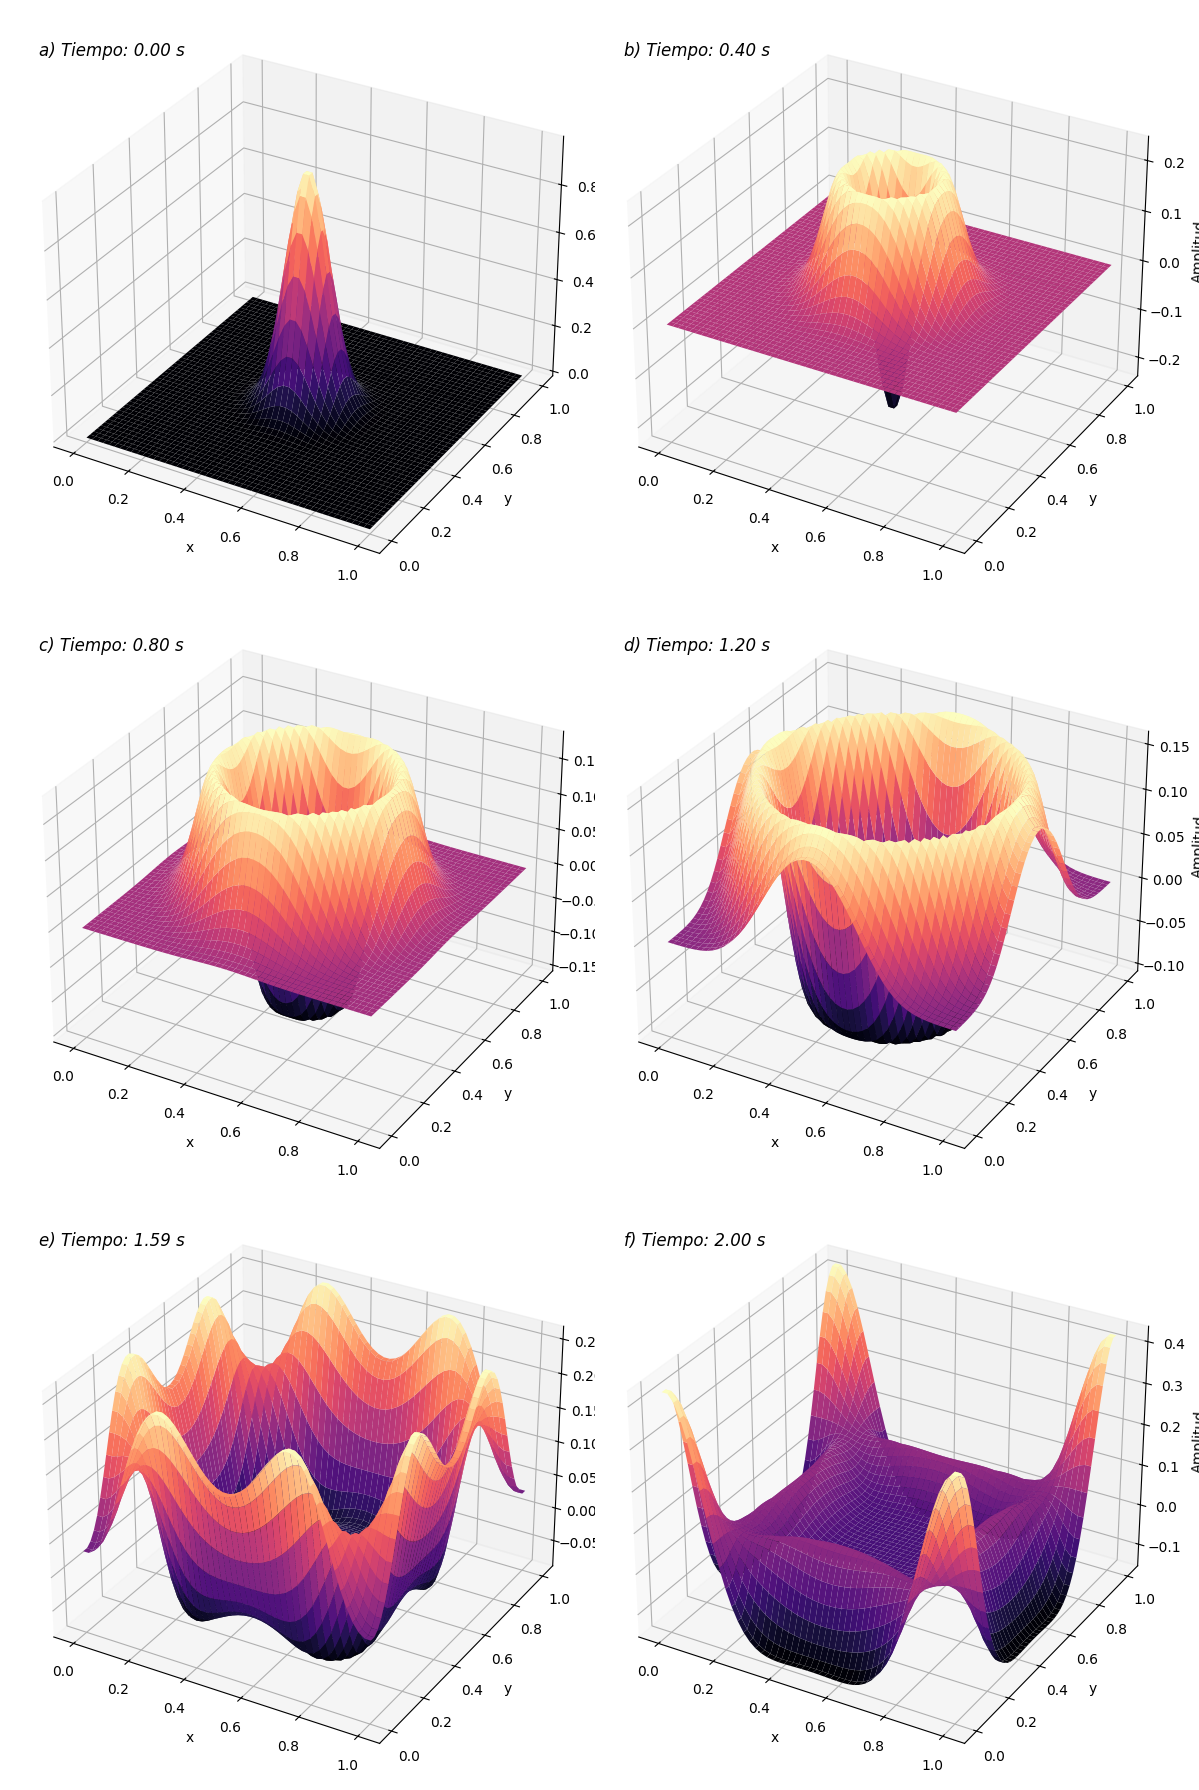

In [ ]:
def simular_onda(Lx=1.0, Ly=1.0, Nx=50, Ny=50, D=0.1, T=2.0, dt=0.005):
    # Cálculo de la malla espacial y paso de tiempo
    Dx, Dy = Lx / (Nx - 1), Ly / (Ny - 1)
    Nt = int(T / dt)

    # Verificación de la condición CFL
    CFL_x = D * dt**2 / Dx**2
    CFL_y = D * dt**2 / Dy**2
    if CFL_x >= 1 or CFL_y >= 1:
        print("La condición CFL no se cumple. Ajusta dt o Dx/Dy.")
        return

    # Dominio espacial
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)

    # Condición inicial
    u = np.zeros((Nt, Nx, Ny))
    u[0] = np.exp(-100 * ((X - 0.5)**2 + (Y - 0.5)**2))  # Estado inicial
    u[1] = np.copy(u[0])  # Segundo paso igual al inicial

    # Coeficientes
    C_x = CFL_x
    C_y = CFL_y

    # Iteración temporal
    for n in range(1, Nt - 1):
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                u[n + 1, i, j] = (
                    2 * u[n, i, j] - u[n - 1, i, j] +
                    C_x * (u[n, i + 1, j] - 2 * u[n, i, j] + u[n, i - 1, j]) +
                    C_y * (u[n, i, j + 1] - 2 * u[n, i, j] + u[n, i, j - 1])
                )

        # Condiciones de flujo cero (Neumann)
        u[n + 1, 0, :] = u[n + 1, 1, :]
        u[n + 1, -1, :] = u[n + 1, -2, :]
        u[n + 1, :, 0] = u[n + 1, :, 1]
        u[n + 1, :, -1] = u[n + 1, :, -2]

    # Visualización
    tiempos = np.linspace(0, Nt - 1, 6, dtype=int)  # Generar 6 tiempos equidistantes
    etiquetas = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)']

    # Crear figura para los subgráficos
    fig, axes = plt.subplots(3, 2, figsize=(12, 18), subplot_kw={'projection': '3d'})

    for idx, (ax, t) in enumerate(zip(axes.flatten(), tiempos)):
        surf = ax.plot_surface(X, Y, u[t], cmap='magma', edgecolor='none')


        tiempo_actual = t * dt  # Calcular el tiempo correspondiente
        ax.text2D(
            0.05, 0.92, f"{etiquetas[idx]} Tiempo: {tiempo_actual:.2f} s",
            transform=ax.transAxes, fontsize=12, color='black', style='italic'
        )

        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("Amplitud")


    plt.tight_layout()
    plt.show()

# Simulación
simular_onda(Lx=1.0, Ly=1.0, Nx=50, Ny=50, D=0.1, T=2.0, dt=0.005)




## Animaciones

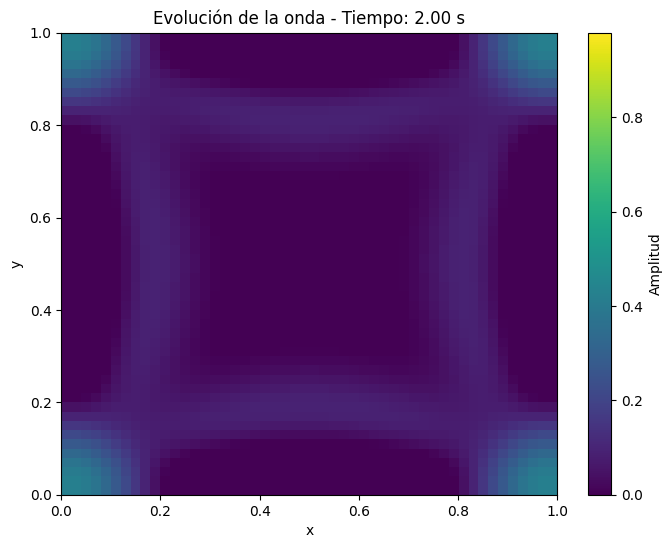

In [ ]:

def simular_onda_animada(Lx=1.0, Ly=1.0, Nx=50, Ny=50, D=0.1, T=2.0, dt=0.005):
    # Cálculo de la malla espacial y paso de tiempo
    Dx, Dy = Lx / (Nx - 1), Ly / (Ny - 1)
    Nt = int(T / dt)

    # Verificación de la condición CFL
    CFL_x = D * dt**2 / Dx**2
    CFL_y = D * dt**2 / Dy**2
    if CFL_x >= 1 or CFL_y >= 1:
        print("La condición CFL no se cumple. Ajusta dt o Dx/Dy.")
        return

    # Dominio espacial
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)

    # Condición inicial
    u = np.zeros((Nt, Nx, Ny))
    u[0] = np.exp(-100 * ((X - 0.5)**2 + (Y - 0.5)**2))  # Estado inicial
    u[1] = np.copy(u[0])  # Segundo paso igual al inicial

    # Coeficientes
    C_x = CFL_x
    C_y = CFL_y

    # Iteración temporal
    for n in range(1, Nt - 1):
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                u[n + 1, i, j] = (
                    2 * u[n, i, j] - u[n - 1, i, j] +
                    C_x * (u[n, i + 1, j] - 2 * u[n, i, j] + u[n, i - 1, j]) +
                    C_y * (u[n, i, j + 1] - 2 * u[n, i, j] + u[n, i, j - 1])
                )

        # Condiciones de flujo cero (Neumann)
        u[n + 1, 0, :] = u[n + 1, 1, :]
        u[n + 1, -1, :] = u[n + 1, -2, :]
        u[n + 1, :, 0] = u[n + 1, :, 1]
        u[n + 1, :, -1] = u[n + 1, :, -2]

    # Crear figura para la animación
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.imshow(u[0], extent=[0, Lx, 0, Ly], origin='lower', cmap='viridis', aspect='auto')
    ax.set_title("Evolución de la onda")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    cbar = fig.colorbar(cax)
    cbar.set_label("Amplitud")

    # Función de actualización
    def actualizar(frame):
        cax.set_array(u[frame])
        ax.set_title(f"Evolución de la onda - Tiempo: {frame * dt:.2f} s")
        return cax,

    # Crear animación
    anim = FuncAnimation(fig, actualizar, frames=Nt, interval=dt*1000, blit=False)


    anim.save('onda.gif', writer=PillowWriter(fps=20))

    # Mostrar animación
    plt.show()

# Simulación con animación
simular_onda_animada(Lx=1.0, Ly=1.0, Nx=50, Ny=50, D=0.1, T=2.0, dt=0.005)


Animación guardada como onda_3d.gif


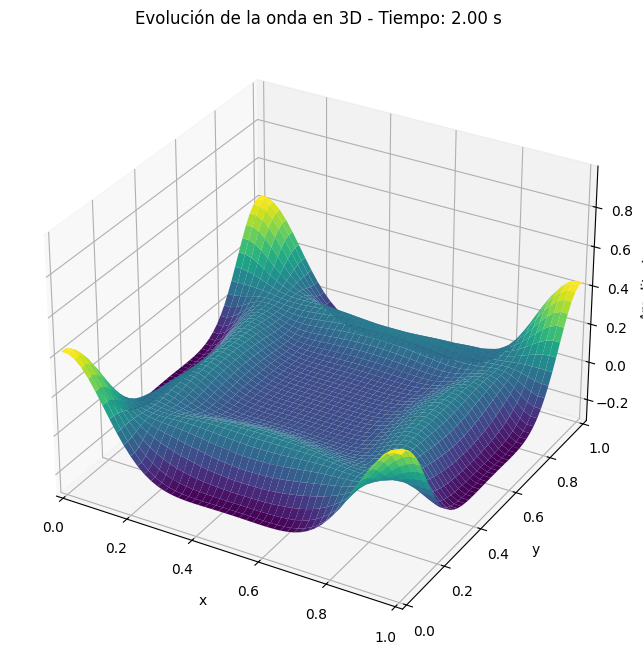

In [ ]:
def simular_onda_animada_3d(Lx=1.0, Ly=1.0, Nx=50, Ny=50, D=0.1, T=2.0, dt=0.005, output_file="onda_3d.gif"):
    # Cálculo de la malla espacial y paso de tiempo
    Dx, Dy = Lx / (Nx - 1), Ly / (Ny - 1)
    Nt = int(T / dt)

    # Verificación de la condición CFL
    CFL_x = D * dt**2 / Dx**2
    CFL_y = D * dt**2 / Dy**2
    if CFL_x >= 1 or CFL_y >= 1:
        print("La condición CFL no se cumple. Ajusta dt o Dx/Dy.")
        return

    # Dominio espacial
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)

    # Condición inicial
    u = np.zeros((Nt, Nx, Ny))
    u[0] = np.exp(-100 * ((X - 0.5)**2 + (Y - 0.5)**2))  # Estado inicial
    u[1] = np.copy(u[0])  # Segundo paso igual al inicial

    # Coeficientes
    C_x = CFL_x
    C_y = CFL_y

    # Iteración temporal
    for n in range(1, Nt - 1):
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                u[n + 1, i, j] = (
                    2 * u[n, i, j] - u[n - 1, i, j] +
                    C_x * (u[n, i + 1, j] - 2 * u[n, i, j] + u[n, i - 1, j]) +
                    C_y * (u[n, i, j + 1] - 2 * u[n, i, j] + u[n, i, j - 1])
                )

        # Condiciones de flujo cero (Neumann)
        u[n + 1, 0, :] = u[n + 1, 1, :]
        u[n + 1, -1, :] = u[n + 1, -2, :]
        u[n + 1, :, 0] = u[n + 1, :, 1]
        u[n + 1, :, -1] = u[n + 1, :, -2]

    # Crear figura para la animación
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Configurar los límites
    ax.set_xlim(0, Lx)
    ax.set_ylim(0, Ly)
    ax.set_zlim(np.min(u), np.max(u))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("Amplitud")

    # Crear la superficie inicial
    surf = [ax.plot_surface(X, Y, u[0], cmap=cm.viridis, edgecolor='none')]

    # Función de actualización
    def actualizar(frame):
        ax.clear()
        ax.set_xlim(0, Lx)
        ax.set_ylim(0, Ly)
        ax.set_zlim(np.min(u), np.max(u))
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("Amplitud")
        ax.set_title(f"Evolución de la onda en 3D - Tiempo: {frame * dt:.2f} s")
        surf[0] = ax.plot_surface(X, Y, u[frame], cmap=cm.viridis, edgecolor='none')
        return surf

    # Crear animación
    anim = FuncAnimation(fig, actualizar, frames=Nt, interval=dt * 1000, blit=False)

    # Guardar animación como GIF
    anim.save(output_file, writer='pillow', fps=30)
    print(f"Animación guardada como {output_file}")

# Simulación con animación en 3D guardada en un GIF
simular_onda_animada_3d(Lx=1.0, Ly=1.0, Nx=50, Ny=50, D=0.1, T=2.0, dt=0.005, output_file="onda_3d.gif")



## Otras simulaciones, variando el parámetro D

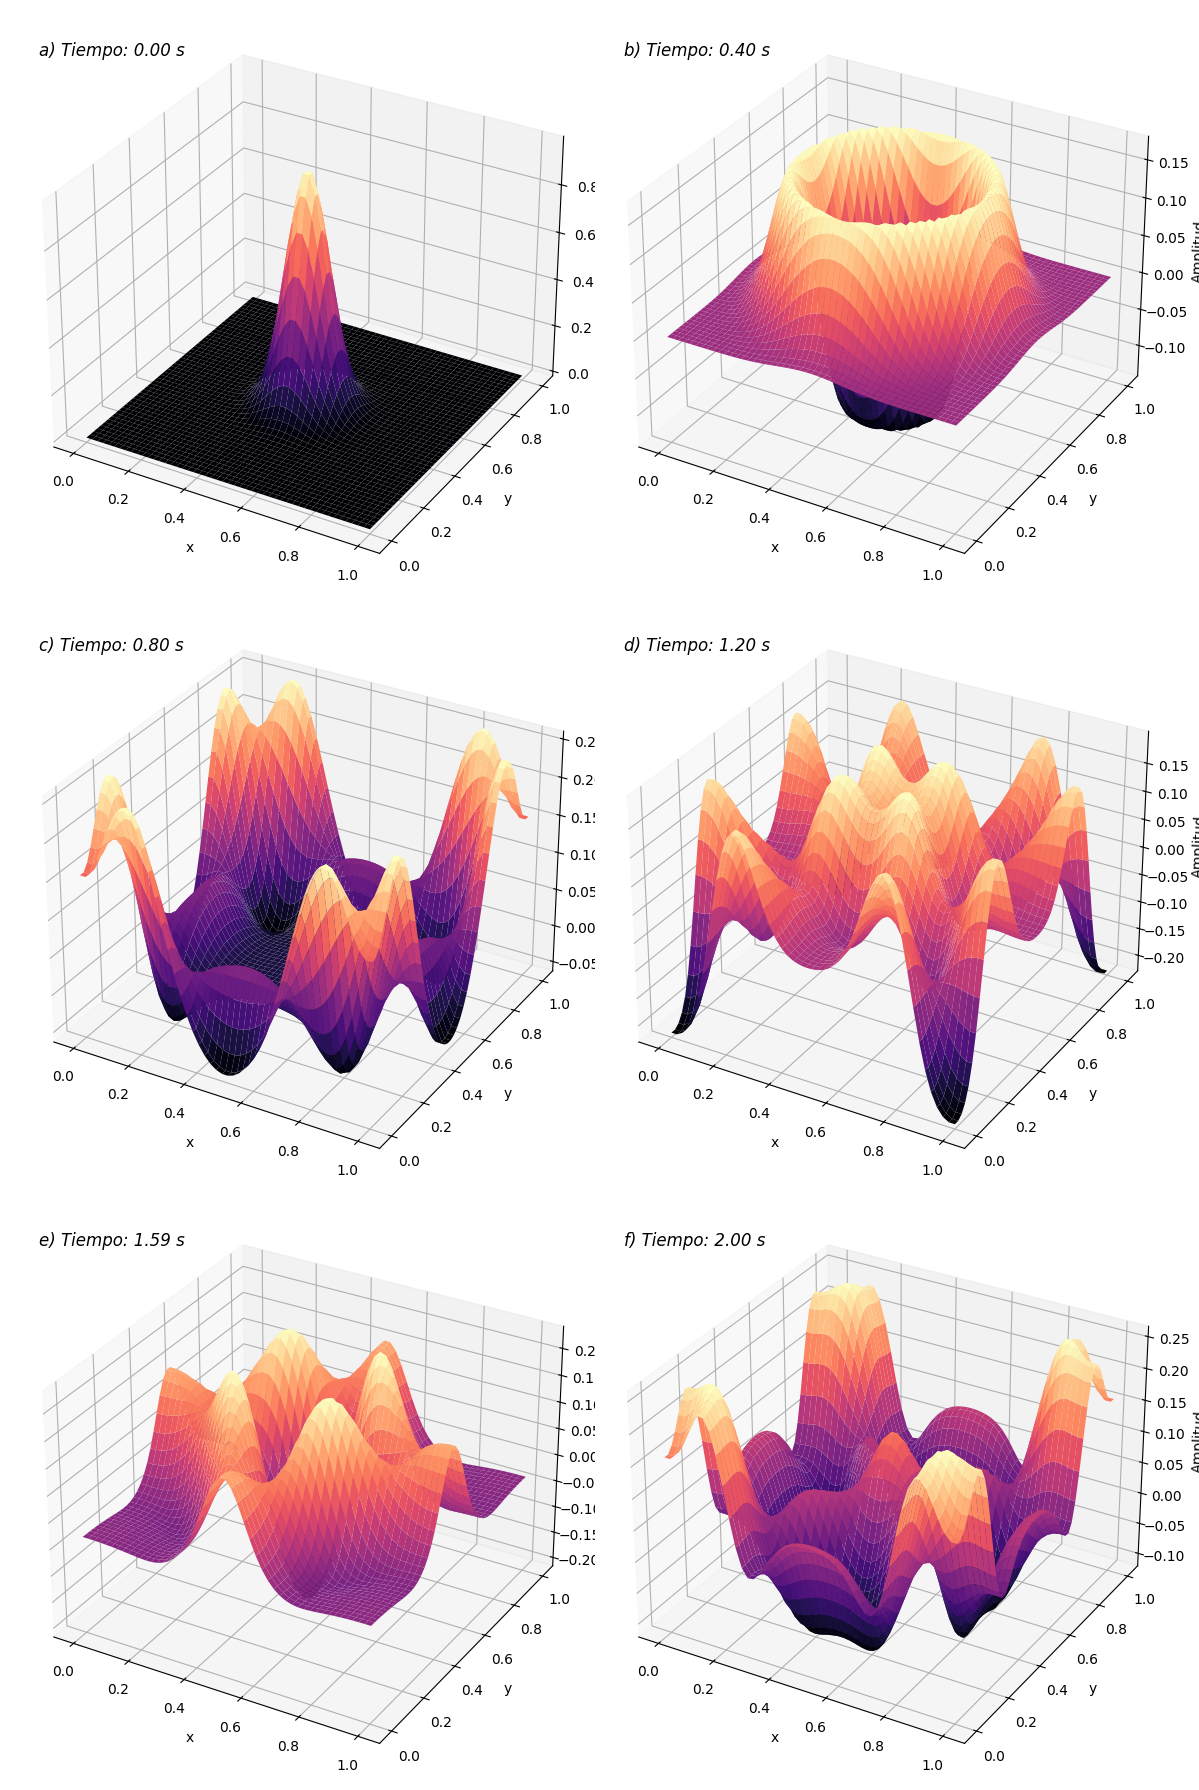

In [ ]:
simular_onda(Lx=1.0, Ly=1.0, Nx=50, Ny=50, D=0.5, T=2.0, dt=0.005)

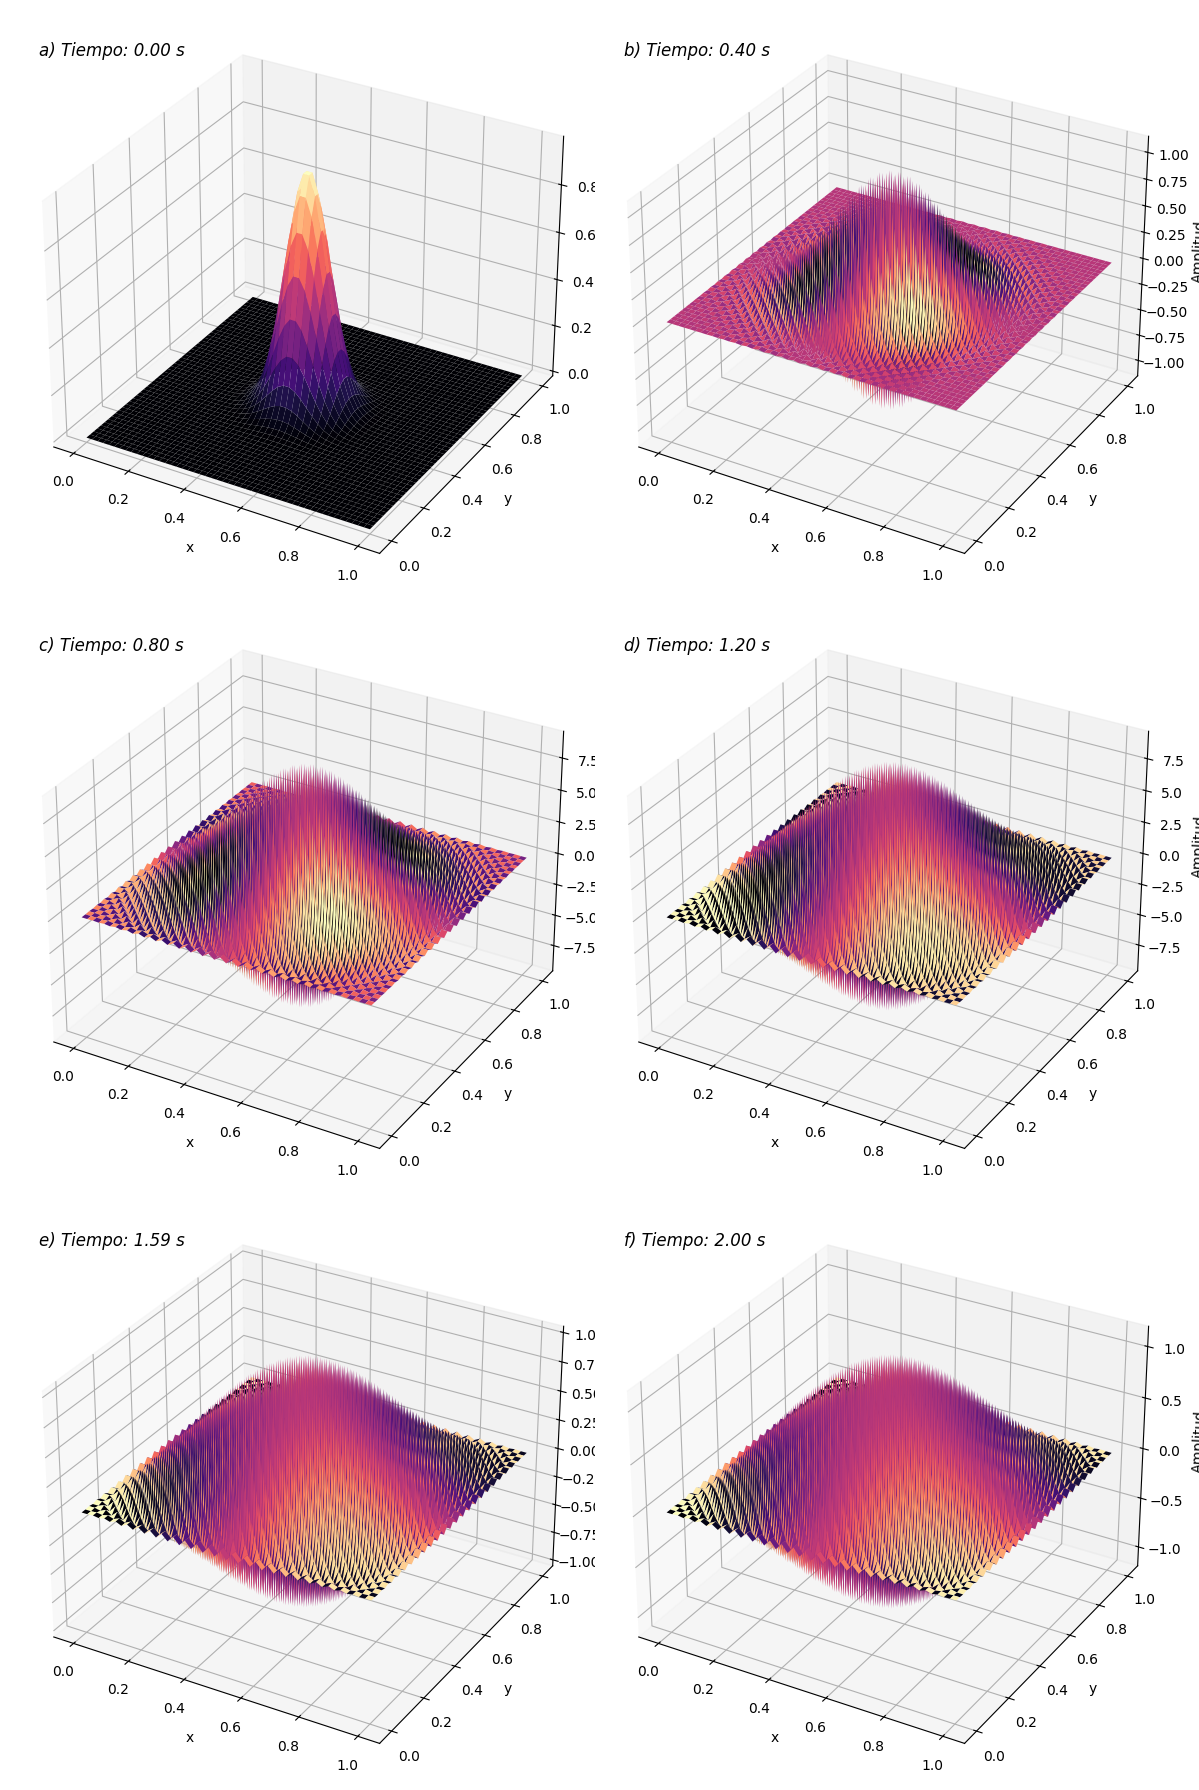

In [ ]:
simular_onda(Lx=1.0, Ly=1.0, Nx=50, Ny=50, D=10, T=2.0, dt=0.005)

In [ ]:
simular_onda(Lx=1.0, Ly=1.0, Nx=50, Ny=50, D=17, T=2.0, dt=0.005)

La condición CFL no se cumple. Ajusta dt o Dx/Dy.
